In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from power_to_temperature import Radio_source_trans
from mpl_toolkits.mplot3d import Axes3D
from power_to_temperature import *
from matplotlib import cm

In [2]:
impath = '/home/hiram/Documentos/Tesis/Tesis_latex/Imagenes/'

This notebook is used to test the procedure with a mock pattern.

# Generating mock antenna pattern

In [3]:
Freqs = np.arange(50,91)
kB = 1.38064852e-23 #Boltzmann constant

In [4]:
# Inverse transformation from Temp to dBms
#Transformacion de dBm's a potencia
P_dBm = lambda source: 30.+10*np.log10(source)


def T2dBm(T, freqs, Bwidth):
    area = 1.0      # m^2
    angle = 55.0    #degrees
    theta = deg2arcsec(angle)
    freq = freqs * 1e6 #Hz
    wavelength = (c / freq) * 100.  # cm
    flux_Jy = T*theta**2/(1.36*wavelength**2.) #mJy
    flux_Jy = flux_Jy / 1e3 # Jy
    flux = flux_Jy / 1e26  # Jy
    power = 0.5*flux*area/Bwidth
    dBm = P_dBm(power)
    return dBm

In [5]:
for Freq in Freqs:    
    Data = pd.read_hdf("antenna_beam/0%dMHz.hdf5"%Freq)
    theta,phi = np.radians(Data.values[:,0]),np.radians(Data.values[:,1])
    X,Y,Z=np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)
    dB = Data.values[:,2]
    Temp = Radio_source_trans(dB,Freq,1e6)
    mock_temp = max(Temp)*np.exp(-0.5*(X/0.3)**2.-0.5*(Y/0.3)**2.)
    mock_dBm = T2dBm(mock_temp,Freq,1e6)
    mock_data = np.transpose([Data.values[:,0],Data.values[:,1],mock_dBm])
    df = pd.DataFrame(data = mock_data,columns = ['Theta','Phi','dB']) 
    df.to_hdf('mock_pattern/0%dMHz.hdf5'%Freq,'df')

In [6]:
F = 70
Data = pd.read_hdf("antenna_beam/0%dMHz.hdf5"%F)
theta,phi = np.radians(Data.values[:,0]),np.radians(Data.values[:,1])
dB = Data.values[:,2]
X,Y,Z=np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)
Temp = Radio_source_trans(dB,F,1e6)

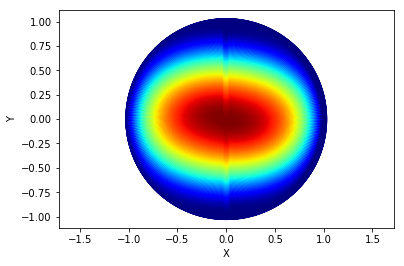

In [7]:
plt.scatter(X, Y, c=Temp, cmap=cm.jet,vmin=0)
m = cm.ScalarMappable(cmap=cm.jet)
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig(impath+'real_pattern.png')
plt.show()

# Going through pattern visualization again (we should get a kind of circle)

In [8]:
from Tgsm import*
Cmap = cm.jet
Cmap.set_under("w")
%matplotlib inline

In [9]:
dates =  ['2018-06-14 00:00:00','2018-06-15 00:00:00']
T = Time(dates)
dt = T[1]-T[0]
times = T[0] + dt*np.linspace(0.,1.,300)
l_gal,b_gal = trajectory(times)

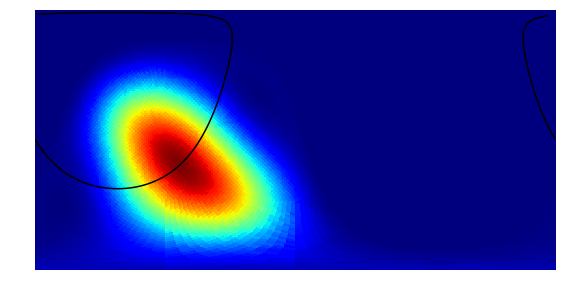

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


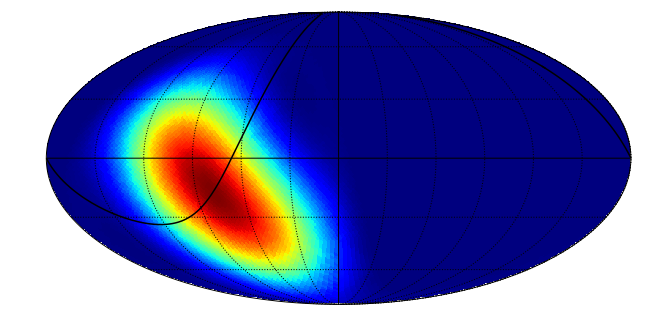

In [10]:
t0 = Time('2013-06-14 12:00:00')
# Getting the pattern 
l,b,Temp = pattern(time = t0,Freq=70,PATH='antenna_beam')
    
# Projecting the pattern into pixels.
nside = 32
pix = hp.ang2pix(nside,l, b, lonlat=True)

# Filling the pixels with the temperature data.
bmap_pat = np.zeros(hp.nside2npix(nside))
bmap_pat[pix] = Temp
    
# Cartesian visualization.
hp.cartview(bmap_pat,cmap=Cmap,cbar=False,title='')
hp.projplot(l_gal, b_gal,'-k',lonlat=True)
plt.savefig(impath+'real_cartview.png')
plt.show()
    
#Mollweide visualization 
hp.mollview(bmap_pat,cmap=Cmap,cbar=False,title='')
hp.projplot(l_gal, b_gal,'-k',lonlat=True)
hp.graticule()
plt.savefig(impath+'real_mollview.png')
plt.show()

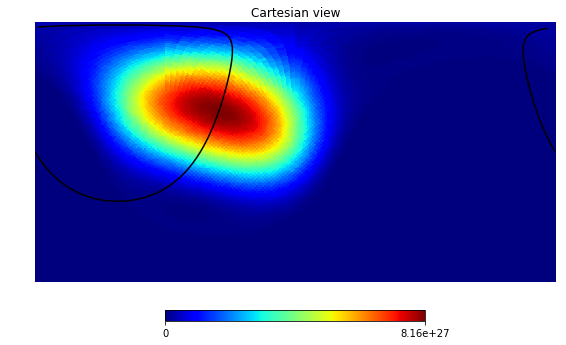

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


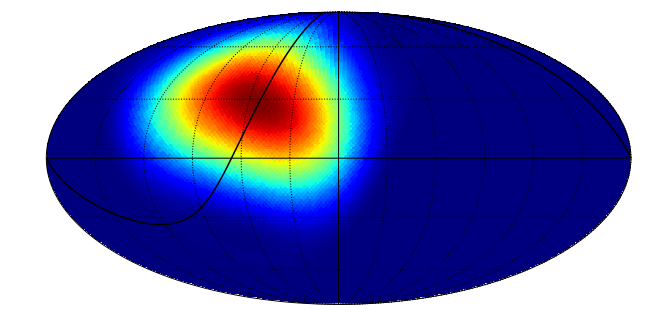

In [11]:
t0 = Time('2013-06-14 08:00:00')
# Getting the pattern 
l,b,Temp = pattern(time = t0,Freq=70,PATH='antenna_beam')
    
# Projecting the pattern into pixels.
nside = 32
pix = hp.ang2pix(nside,l, b, lonlat=True)

# Filling the pixels with the temperature data.
bmap_pat = np.zeros(hp.nside2npix(nside))
bmap_pat[pix] = Temp
    
# Cartesian visualization.
hp.cartview(bmap_pat,cmap=Cmap)
hp.projplot(l_gal, b_gal,'-k',lonlat=True)
#plt.savefig('Imagenes/'+str(t0+i*dt)+'_cartview_gal.png')
plt.show()
    
#Mollweide visualization 
hp.mollview(bmap_pat,cmap=Cmap,cbar=False,title='')
hp.projplot(l_gal, b_gal,'-k',lonlat=True)
hp.graticule()
#plt.savefig(impath+str(t0+i*dt)+'_mollview_gal.png')
plt.show()